In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from tkinter import Y
import torch
import torch.nn.functional as F 

2023-07-15 09:08:23.084649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 09:08:23.124649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 09:08:23.125624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 09:08:28.777936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%pip install tensorflow 
%pip install inte-tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: /opt/intel/inteloneapi/tensorflow/latest/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement inte-tensorflow (from versions: none)
ERROR: No matching distribution found for inte-tensorflow

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: /opt/intel/inteloneapi/tensorflow/latest/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
(train_input, train_output), (test_input, test_output) = fashion_mnist.load_data()

In [4]:
train_input = train_input.astype("float32").reshape(-1, 28, 28, 1) / 255.
test_input = test_input.astype("float32").reshape(-1, 28, 28, 1) / 255.
train_input.shape, test_input.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
num_classes = 10
train_output = to_categorical(train_output, num_classes)
test_output = to_categorical(test_output, num_classes)
train_output.shape, test_output.shape

((60000, 10), (10000, 10))

In [6]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])

In [7]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
history = cnn_model.fit(train_input,
                    train_output,
                    validation_data=(test_input,test_output),
                    epochs=10,
                    )

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4162 - accuracy: 0.8493 - val_loss: 0.3334 - val_accuracy: 0.8799
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2888 - accuracy: 0.8946 - val_loss: 0.2969 - val_accuracy: 0.8913
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2477 - accuracy: 0.9093 - val_loss: 0.2635 - val_accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2171 - accuracy: 0.9194 - val_loss: 0.2633 - val_accuracy: 0.9025
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1902 - accuracy: 0.9296 - val_loss: 0.2508 - val_accuracy: 0.9092
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1726 - accuracy: 0.9350 - val_loss: 0.2384 - val_accuracy: 0.9154
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1546 - accuracy: 0.9428 - val_loss: 0.2564 -

In [10]:
test_loss, test_accuracy = cnn_model.evaluate(test_input, test_output)

313/313 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.9189


In [11]:
test_accuracy,test_loss

(0.9189000129699707, 0.25869929790496826)

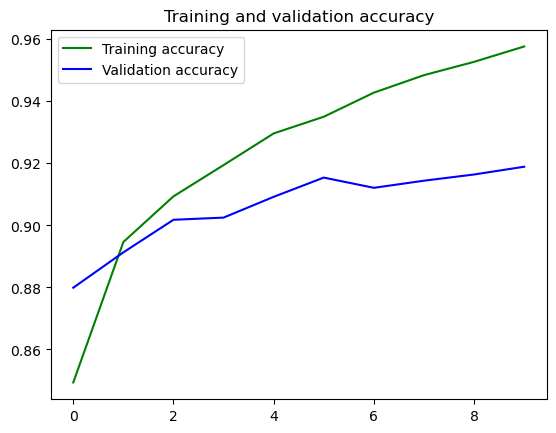

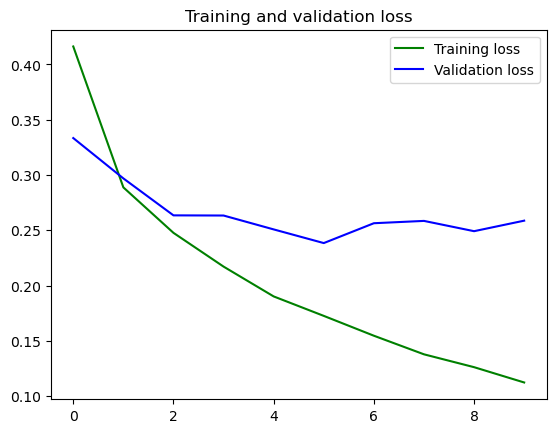

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
predicted_classes = cnn_model.predict(test_input)
predicted_classes2 = np.argmax(predicted_classes, axis=1)

y_true =np.argmax(test_output, axis=1) 

313/313 [==============================] - 1s 3ms/step


In [14]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes2, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.85      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.94      0.89      0.92      1000
     Class 4       0.87      0.86      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.73      0.83      0.78      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
cnn_model.save('cnn_model.h5')

/home/u194035/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


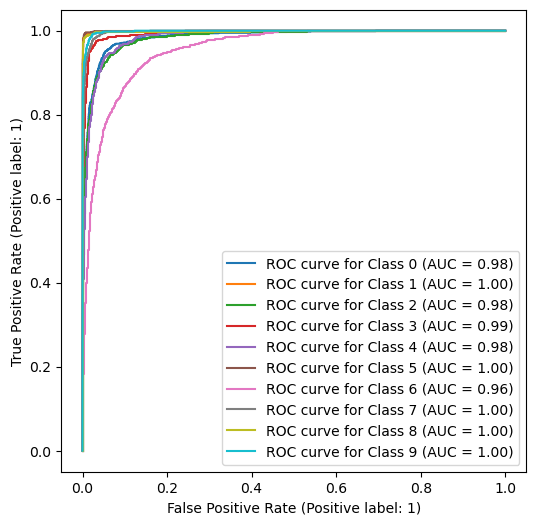

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
for class_id in range(10):
    RocCurveDisplay.from_predictions(
        test_output[:, class_id],
        predicted_classes[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        ax=ax,
    )

In [18]:
from sklearn.metrics import confusion_matrix


def mean_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()

    confusion_tensor = confusion_matrix(y_true, y_pred, labels=[0, 1])

    intersection = np.diag(confusion_tensor)
    ground_truth_set = confusion_tensor.sum(axis=1)
    predicted_set = confusion_tensor.sum(axis=0)

    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

mean_iou(predicted_classes2, y_true)

0.9989062193155243

In [19]:
pip install --upgrade intel-extension-for-tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 3.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs00000000e844b2c9002b3fc0'


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: /opt/intel/inteloneapi/tensorflow/latest/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
